<a href="https://colab.research.google.com/github/HuynhTanNam-19146217/Week14/blob/FRUIT/Fruit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import SGD, RMSprop
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
import tensorflow as  tf
import numpy as np
import cv2
import os
from keras.utils import np_utils
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from keras.models import Sequential
from keras.layers import Dense,Flatten, Dropout
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
from keras.layers import Conv2D, MaxPooling2D

In [ ]:
train = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
validation = ImageDataGenerator(rescale = 1./255)

In [ ]:
train_set=train.flow_from_directory('/content/drive/MyDrive/FRUIT1/train1',target_size = (64,64),batch_size = 12,class_mode = 'categorical')
test_set=validation.flow_from_directory('/content/drive/MyDrive/FRUIT1/test1',target_size = (64,64),batch_size = 12,class_mode = 'categorical')

Found 699 images belonging to 10 classes.
Found 272 images belonging to 10 classes.


In [ ]:
train_set.class_indices

{'chuối': 0,
 'dâu tây': 1,
 'dưa hấu': 2,
 'dừa': 3,
 'dứa': 4,
 'khế': 5,
 'măng cụt': 6,
 'ổi': 7,
 'táo': 8,
 'xoài': 9}

In [ ]:
model = tf.keras.models.Sequential(
    [ tf.keras.layers.Conv2D(32,(3,3),activation = 'relu',kernel_initializer='he_uniform',padding='same',input_shape =(64,64,3)),
      tf.keras.layers.Conv2D(32,(3,3),activation = 'relu',kernel_initializer='he_uniform',padding='same'),
      tf.keras.layers.MaxPool2D(2,2),

      tf.keras.layers.Conv2D(32,(3,3),activation = 'relu',kernel_initializer='he_uniform',padding='same'),
      tf.keras.layers.Conv2D(32,(3,3),activation = 'relu',kernel_initializer='he_uniform',padding='same'),
      tf.keras.layers.MaxPool2D(2,2),

      tf.keras.layers.Conv2D(64,(3,3),activation = 'relu',kernel_initializer='he_uniform',padding='same'),
      tf.keras.layers.Conv2D(64,(3,3),activation = 'relu',kernel_initializer='he_uniform',padding='same'),
      tf.keras.layers.MaxPool2D(2,2),

      tf.keras.layers.Conv2D(128,(3,3),activation = 'relu',kernel_initializer='he_uniform',padding='same'),
      tf.keras.layers.Conv2D(128,(3,3),activation = 'relu',kernel_initializer='he_uniform',padding='same'),
      tf.keras.layers.MaxPool2D(2,2),
     
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(256,activation = 'relu',kernel_initializer='he_uniform'),
      tf.keras.layers.Dense(10,activation='softmax')])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_32 (Conv2D)          (None, 64, 64, 32)        896       
                                                                 
 conv2d_33 (Conv2D)          (None, 64, 64, 32)        9248      
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 32, 32, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_34 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 conv2d_35 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                 

In [ ]:
opt = SGD(lr=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics = ['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [ ]:
history = model.fit(train_set,batch_size=128,epochs=20,verbose=1,validation_data=test_set)

Epoch 1/20
59/59 [==============================] - 24s 418ms/step - loss: 0.2940 - accuracy: 0.8941 - val_loss: 0.5952 - val_accuracy: 0.8309
Epoch 2/20
59/59 [==============================] - 24s 411ms/step - loss: 0.2220 - accuracy: 0.9213 - val_loss: 0.5534 - val_accuracy: 0.8493
Epoch 3/20
59/59 [==============================] - 24s 407ms/step - loss: 0.2492 - accuracy: 0.9227 - val_loss: 0.5526 - val_accuracy: 0.8346
Epoch 4/20
59/59 [==============================] - 24s 407ms/step - loss: 0.1934 - accuracy: 0.9256 - val_loss: 0.5470 - val_accuracy: 0.8566
Epoch 5/20
59/59 [==============================] - 24s 408ms/step - loss: 0.2005 - accuracy: 0.9285 - val_loss: 0.6466 - val_accuracy: 0.8456
Epoch 6/20
59/59 [==============================] - 24s 412ms/step - loss: 0.1600 - accuracy: 0.9428 - val_loss: 0.6851 - val_accuracy: 0.8529
Epoch 7/20
59/59 [==============================] - 24s 410ms/step - loss: 0.1763 - accuracy: 0.9413 - val_loss: 0.5572 - val_accuracy: 0.8382

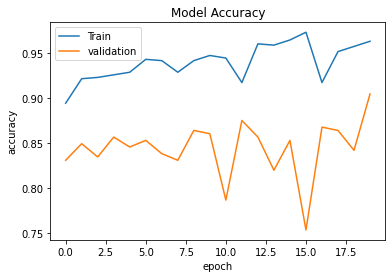

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train','validation'],loc='upper left')
plt.show()

In [ ]:
score=model.evaluate(test_set,verbose=1)
print('Sai số: ',score[0])
print('Độ chính xác: ',score[1])

23/23 [==============================] - 3s 148ms/step - loss: 0.4798 - accuracy: 0.9044
Sai số:  0.4797544479370117
Độ chính xác:  0.904411792755127


In [ ]:
model.save('TraiCay.h5')

In [ ]:
from tensorflow.keras.models import load_model
model1=load_model('TraiCay.h5')

dự đoán: Chuối


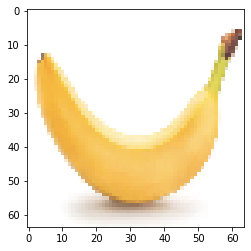

In [ ]:
test_img=load_img('/content/drive/MyDrive/FRUIT1/test1/chuối/Screen Shot 2018-06-12 at 9.38.04 PM.png',target_size=(64,64))
plt.imshow(test_img)
test_img= img_to_array(test_img)
test_img=test_img/255
test_img=np.expand_dims(test_img,axis=0)
result=model.predict(test_img)
if round(result[0][0])==1:
  prediction="Chuối"
elif round(result[0][1])==1:
  prediction="Dâu Tây"
elif round(result[0][2])==1:
  prediction="Dưa hấu"
elif round(result[0][3])==1:
  prediction="Dừa"  
elif round(result[0][4])==1:
  prediction="Dứa" 
elif round(result[0][5])==1:
  prediction="Khế"
elif round(result[0][6])==1:
  prediction="Măng cụt"
elif round(result[0][7])==1:
  prediction="Ổi"  
elif round(result[0][8])==1:
  prediction="Táo" 
elif round(result[0][9])==1:
  prediction="Xoài"
print('dự đoán:', prediction)